<a href="https://colab.research.google.com/github/erica00j/machinelearning/blob/main/Kfold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

List of possible accuracy: [0.9649122807017544, 0.9473684210526315, 0.9649122807017544, 0.9649122807017544, 0.9122807017543859, 1.0, 0.9473684210526315, 1.0, 0.9824561403508771, 0.9821428571428571]

Maximum Accuracy That can be obtained from this model is: 100.0 %

Minimum Accuracy: 91.22807017543859 %

Overall Accuracy: 96.66353383458647 %

Standard Deviation is: 0.02671442331152429


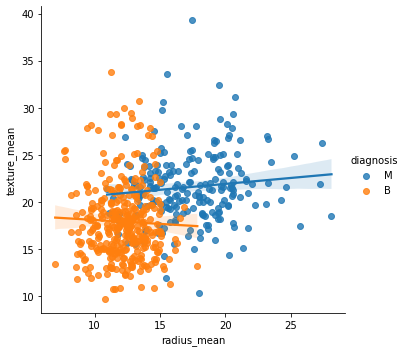

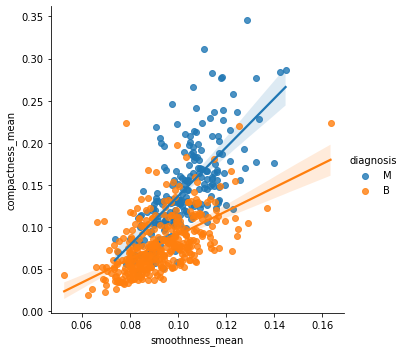

In [ ]:
# Import Required Modules.
import pandas as pd
from statistics import mean, stdev
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn import datasets
 
 # http://www.kaggle.com/uciml/breast-cancer-wisconsin-data
df = pd.read_csv('/content/data.csv')    

del df['id']
del df['Unnamed: 32']

X = df.drop('diagnosis', axis=1)
y = df['diagnosis']
  

# Feature Scaling for input features.
scaler = preprocessing.MinMaxScaler()
X_scaled = scaler.fit_transform(X)
  
# Create  classifier object.
lr = linear_model.LogisticRegression()
  
# Create KFold object.
kf = KFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []
  
for train_index, test_index in kf.split(X, y):
    X_train_fold, X_test_fold = X_scaled[train_index], X_scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    lr.fit(X_train_fold, y_train_fold)
    lst_accu_stratified.append(lr.score(X_test_fold, y_test_fold))
  
# Print the output.
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))

import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x = 'radius_mean', y = 'texture_mean', hue = 'diagnosis', data = df)

sns.lmplot(x ='smoothness_mean', y = 'compactness_mean', 
           data = df, hue = 'diagnosis')